In [93]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import re
import mailbox

In [94]:
#load the file 'datafile.csv' to df
df = pd.read_csv('datafile.csv')

In [28]:
#check information of the data file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999998 entries, 0 to 9999997
Data columns (total 8 columns):
Unnamed: 0       int64
event_time       object
event_type       object
product_id       int64
category_code    object
brand            object
price            float64
user_id          int64
dtypes: float64(1), int64(3), object(4)
memory usage: 610.4+ MB


In [29]:
#check if there is any null value in the df
df.isnull().any()

Unnamed: 0       False
event_time       False
event_type       False
product_id       False
category_code    False
brand            False
price            False
user_id          False
dtype: bool

In [30]:
# check feature of the df
df.tail()

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id
9999993,2237675,2019-11-02 12:26:57 UTC,view,61700012,non-avaliable,atlant,180.18,540807712
9999994,2671287,2019-11-02 16:57:35 UTC,view,61700012,non-avaliable,atlant,180.18,549358123
9999995,4845232,2019-11-04 05:29:29 UTC,view,61700012,non-avaliable,atlant,180.18,529390009
9999996,4524169,2019-11-03 20:55:42 UTC,view,61700012,non-avaliable,atlant,180.18,514022872
9999997,2618092,2019-11-02 16:27:40 UTC,view,61700012,non-avaliable,atlant,180.18,520627341


So what’s the most popular category for view, cart and purchase?


In [31]:
#count view, cart and purchase in each category. 
viewed_cate = df.groupby(by='category_code')['event_type'].apply(lambda x: (x =='view').sum()).reset_index(name = 'count').sort_values(['count'])
purchased_cate = df.groupby(by='category_code')['event_type'].apply(lambda x: (x =='purchase').sum()).reset_index(name = 'count').sort_values(['count'])
cart_cate = df.groupby(by='category_code')['event_type'].apply(lambda x: (x =='cart').sum()).reset_index(name = 'count').sort_values(['count'])

# Take top 10 to do analyze
viewed_cate_lable = viewed_cate['category_code'].tolist()[-10:]
viewed_cate_size = viewed_cate['count'].tolist()[-10:]

purchased_cate_lable = purchased_cate['category_code'].tolist()[-10:]
purchased_cate_size = purchased_cate['count'].tolist()[-10:]

cart_cate_lable = cart_cate['category_code'].tolist()[-10:]
cart_cate_size = cart_cate['count'].tolist()[-10:]

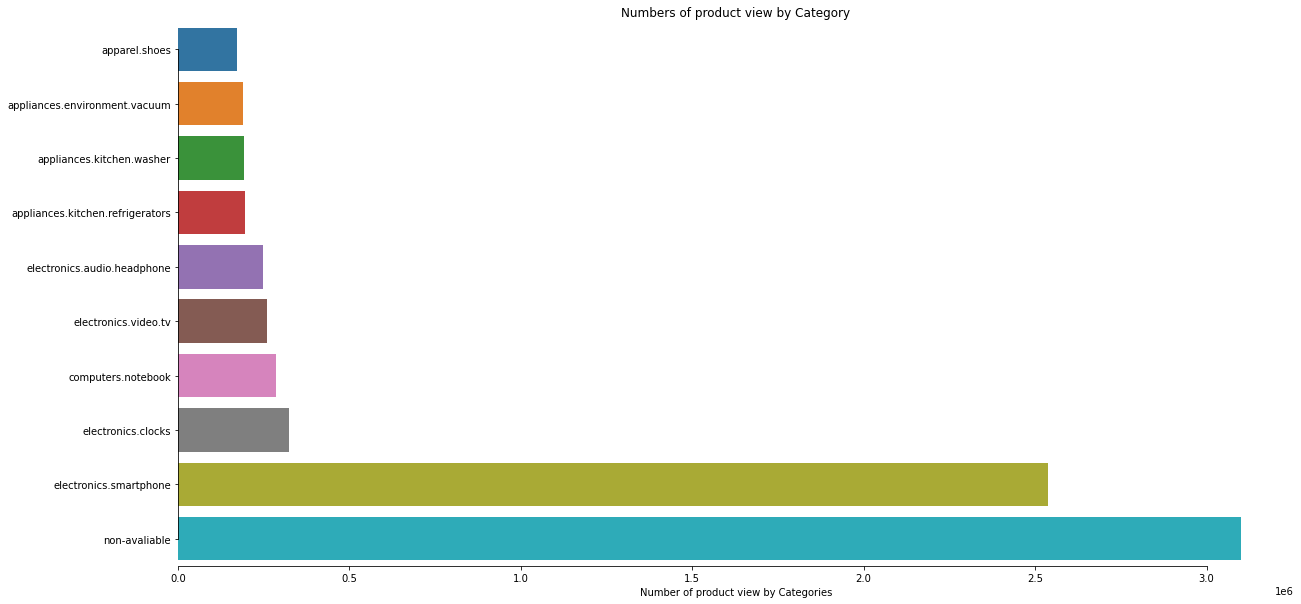

In [32]:
# Draw a bar plot of products view by categories. 
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=viewed_cate_size, y=viewed_cate_lable)
sns.despine(trim=True)
ax.set_title("Numbers of product view by Category")
ax.set_xlabel("Number of product view by Categories")
plt.show()

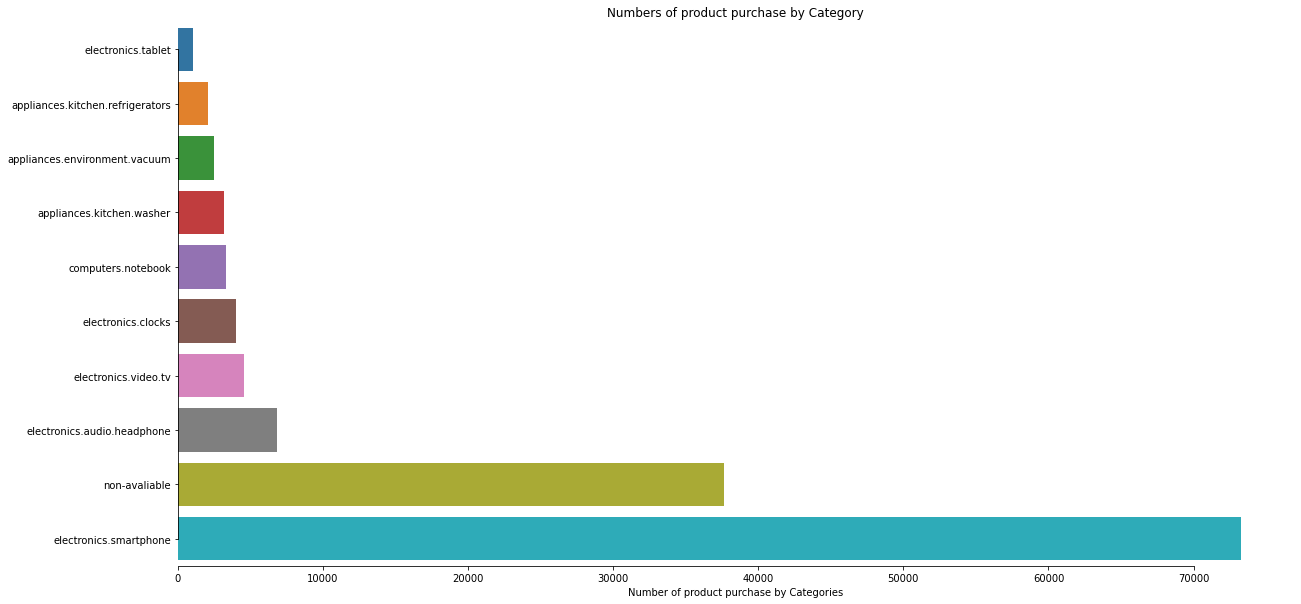

In [33]:
# Draw a bar plot of products purchased by categories.sort the data by count
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x = purchased_cate_size, y = purchased_cate_lable)
sns.despine(trim=True)
ax.set_title("Numbers of product purchase by Category")
ax.set_xlabel("Number of product purchase by Categories")
plt.show()

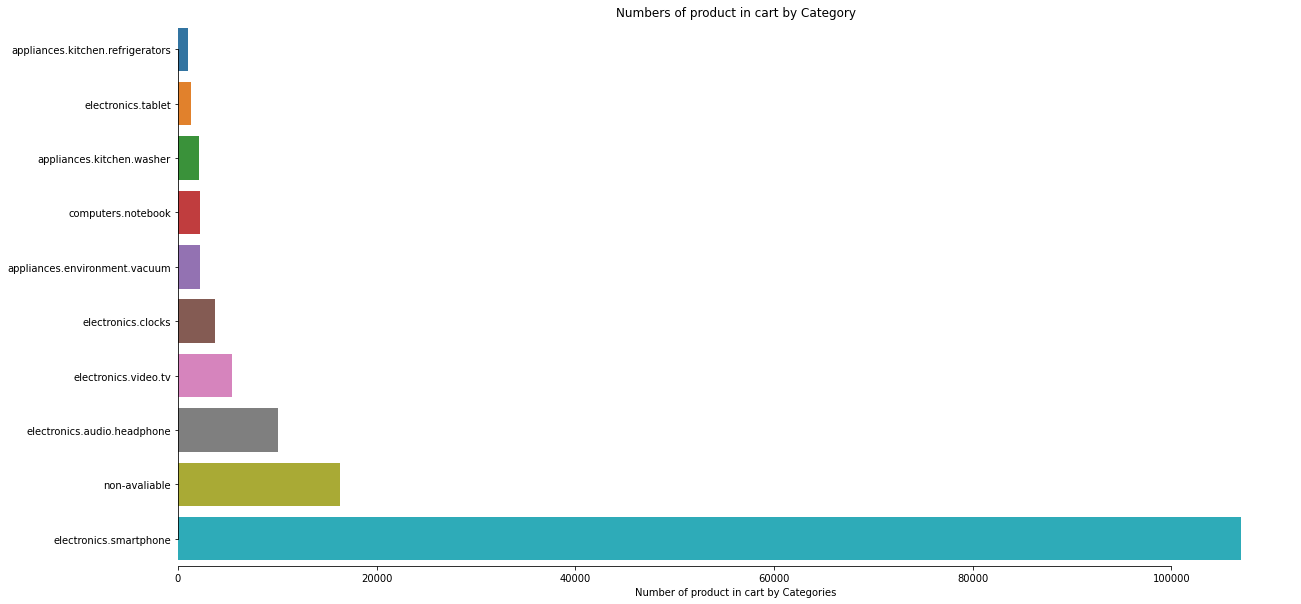

In [34]:
# Draw a bar plot of products cart by categories. 
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=cart_cate_size, y=cart_cate_lable)
sns.despine(trim=True)
ax.set_title("Numbers of product in cart by Category")
ax.set_xlabel("Number of product in cart by Categories")
plt.show()

No matter which kind of events, ‘electronics smartphone’ alway occupies the top position of the category being viewed, put in cart and purchased.


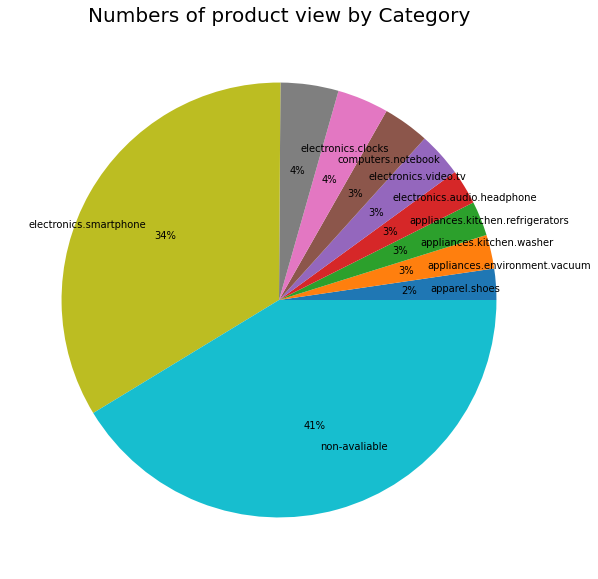

In [35]:
# Pie slot to show spread of top 10 product been viewed by categary
f, ax = plt.subplots(figsize=(10, 10))
plt.pie(viewed_cate_size, autopct = '%.0f%%',labels=viewed_cate_lable, labeldistance = 0.7)
plt.title("Numbers of product view by Category", size = 20)
plt.show()

The pie plot shows the same result, electronics smartphone occuptied the 34% in the whole products that have been viewed.

Then which brand is the top in three events?

In [36]:
#How many view,cart and purchase in each band. sort the data by count
viewed_brand = df.groupby(by='brand')['event_type'].apply(lambda x: (x =='view').sum()).reset_index(name = 'count').sort_values(['count'])
purchased_brand = df.groupby(by='brand')['event_type'].apply(lambda x: (x =='purchase').sum()).reset_index(name = 'count').sort_values(['count'])
cart_cate = df.groupby(by='brand')['event_type'].apply(lambda x: (x =='cart').sum()).reset_index(name = 'count').sort_values(['count'])

viewed_brand_lable = viewed_brand['brand'].tolist()[-10:]
viewed_brand_size = viewed_brand['count'].tolist()[-10:]

purchased_brand_lable = purchased_brand['brand'].tolist()[-10:]
purchased_brand_size = purchased_brand['count'].tolist()[-10:]

cart_brand_lable = cart_cate['brand'].tolist()[-10:]
cart_brand_size = cart_cate['count'].tolist()[-10:]

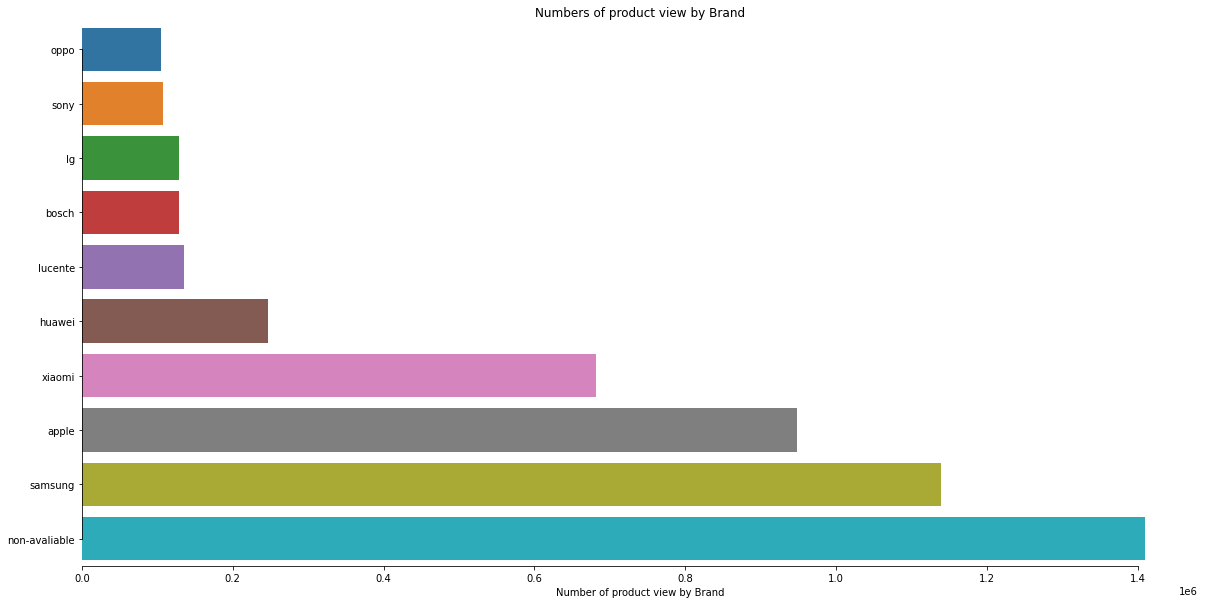

In [37]:
#Draw a bar plot of products view by Brands.sort the data by count
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=viewed_brand_size, y=viewed_brand_lable)
sns.despine(trim=True)
ax.set_title("Numbers of product view by Brand")
ax.set_xlabel("Number of product view by Brand")
plt.show()

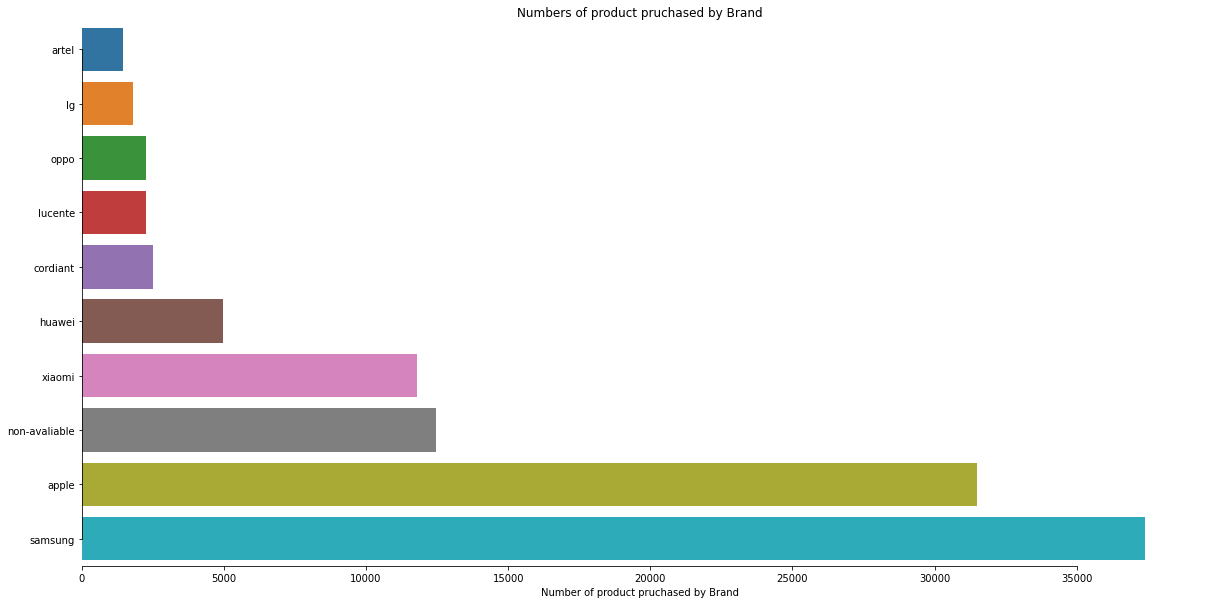

In [38]:
# Draw a bar plot of products view by Brands. sort the data by count
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x = purchased_brand_size, y = purchased_brand_lable)
sns.despine(trim=True)
ax.set_title("Numbers of product pruchased by Brand")
ax.set_xlabel("Number of product pruchased by Brand")
plt.show()

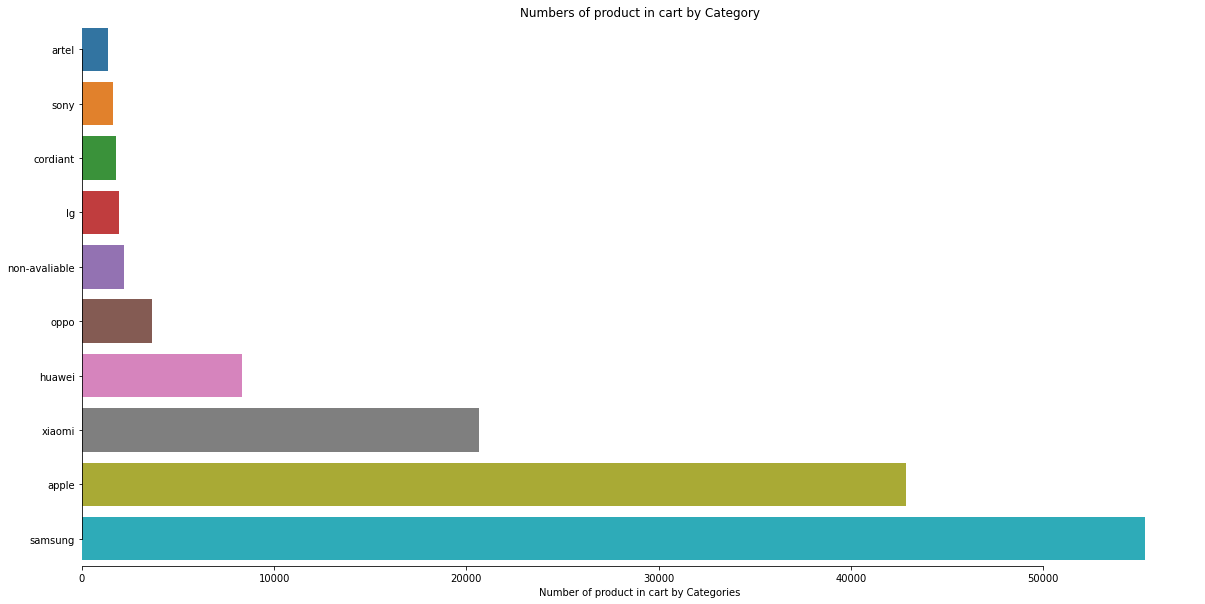

In [39]:
# Draw a bar plot of products cart by brand. 
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=cart_brand_size, y=cart_brand_lable)
sns.despine(trim=True)
ax.set_title("Numbers of product in cart by Category")
ax.set_xlabel("Number of product in cart by Categories")
plt.show()

Very interesting, if the top category is smartphones, the most popular brand is not Apple but Samsung, and the numbers of Samsung being viewed, in cart or purchased are far more than Apple. Xiaomi and Huawei keep following the top two brands, taking No.3 and No.4 positions. However, there are all brands of smartphone and electrical brands. This result is consistent with the results of the previous category analysis.


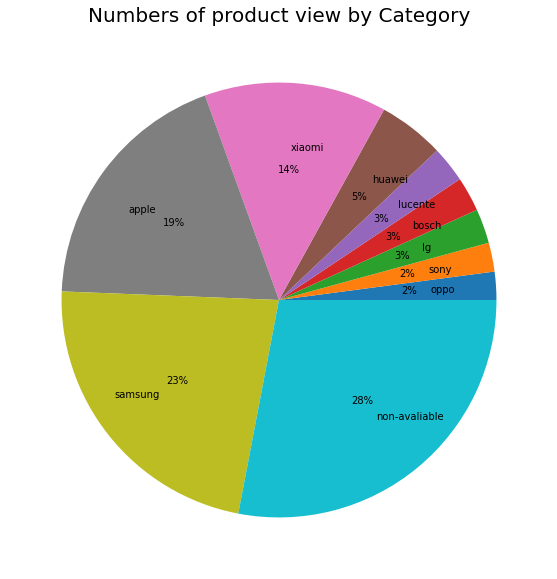

In [40]:
# Pie slot to show spread of top 10 product been viewed by brand
f, ax = plt.subplots(figsize=(10, 10))
plt.pie(viewed_brand_size, autopct = '%.0f%%',labels=viewed_brand_lable, labeldistance = 0.7)
plt.title("Numbers of product view by Category", size = 20)
plt.show()

The pie plot shows clearly again. Samsung is the winner of most viewed smartphone.

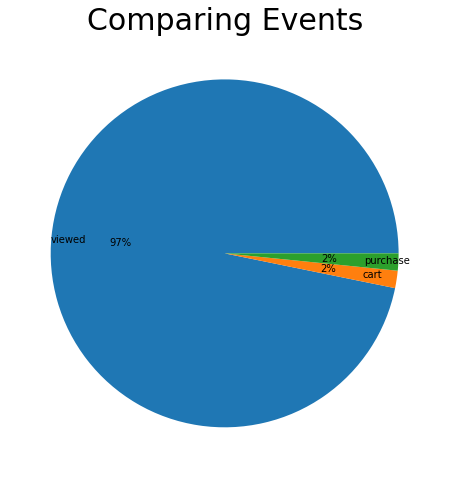

In [41]:
# Compare number of product view, cart and purchase
f, ax = plt.subplots(figsize=(8, 8))
view_count = df[df['event_type']=='view']['event_type'].count()
cart_count = df[df['event_type']=='cart']['event_type'].count()
purchase_count = df[df['event_type']=='purchase']['event_type'].count()
cate_total_size = [view_count, cart_count, purchase_count]
cate_total_lable = ['viewed', 'cart', 'purchase']
plt.pie(cate_total_size, autopct = '%.0f%%',labels=cate_total_lable, labeldistance = 0.8)
plt.title("Comparing Events", size = 30)
plt.show()

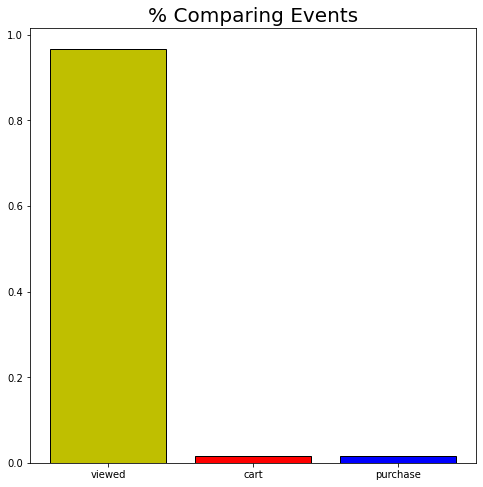

In [89]:
# Compare number of product view, cart and purchase
f, ax = plt.subplots(figsize=(8, 8))
view_count = df[df['event_type']=='view']['event_type'].count()
cart_count = df[df['event_type']=='cart']['event_type'].count()
purchase_count = df[df['event_type']=='purchase']['event_type'].count()
totalsize = view_count+cart_count+purchase_count
cate_total_size = [view_count/totalsize, cart_count/totalsize, purchase_count/totalsize]
cate_total_lable = ['viewed', 'cart', 'purchase']

# histgram plot to show comparing
# plt.hist(x=cate_total_lable, density = False)
plt.bar(cate_total_lable, cate_total_size, color= ['y', 'r', 'b'], ec = 'black')
plt.title("% Comparing Events", size = 20)
plt.show()

We can see the view behavior is about 97%, and put in cart and purchase are only 1~2% each. 
The next scatter plot will more intuitively list the proportions of the three behaviors:

In [111]:
# products been view and purchase comparing
product_event = pd.pivot_table(df, index='product_id', columns='event_type', values='price', aggfunc='count',fill_value = 0)
product_event

event_type,cart,purchase,view
product_id,,,
1000978,0,0,20
1001588,0,3,460
1001606,0,0,4
1002042,5,3,300
1002062,0,5,63
...,...,...,...
61700007,0,0,16
61700008,0,0,15
61700010,0,0,10


In [112]:
viewed = product_event['view']
carted = product_event['cart']
purchased = product_event['purchase']
eventtotal = product_event.sort_values(by = 'product_id').reset_index()


In [120]:
#stacked plot
# f, ax = plt.subplots(figsize=(40, 20))

# sns.barplot(x='view', y = eventtotal.index, data= product_event, label='viewed', color="b")
# sns.barplot(x='cart' , y= eventtotal.index, data=product_event, label='carted', color="orange")
# sns.barplot(x='purchase', y= eventtotal.index, data=product_event, label='purchased', color="r")
# # sns.despine(trim=True)

# plt.title("Events Happened on Each Products", fontsize = 60)
# plt.ylabel("Products Index", fontsize = 40)
# plt.xlabel("Number of Events Happened", fontsize = 40)
# plt.legend(prop={'size':40})

# plt.show()

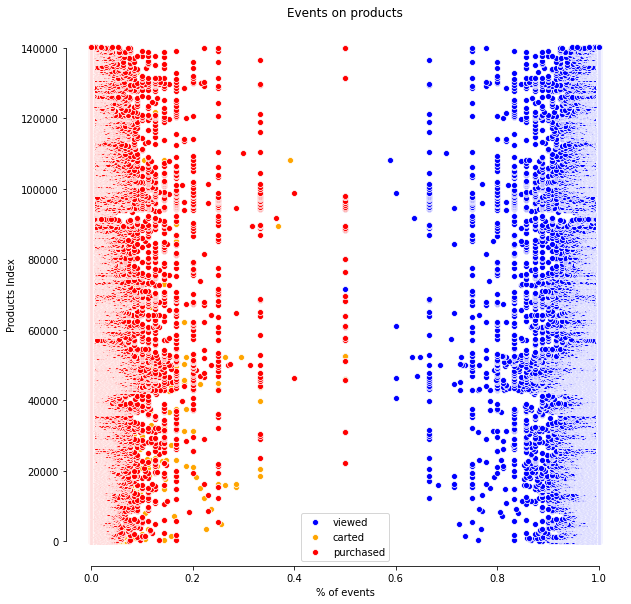

In [46]:
#scatter plot
f, ax = plt.subplots(figsize=(10, 10))

totalevent = viewed + carted + purchased

product_event['view_rates'] = viewed/totalevent
product_event['cart_rates'] = carted/totalevent
product_event['purchase_rates'] = purchased/totalevent

sns.scatterplot(x= 'view_rates' , y= eventtotal.index, data=product_event, label='viewed', color="b")
sns.scatterplot(x= 'cart_rates' , y= eventtotal.index, data=product_event, label='carted', color="orange")
sns.scatterplot(x= 'purchase_rates', y= eventtotal.index, data=product_event, label='purchased', color="r")
sns.despine(trim=True)

plt.title("Events on products")
plt.xlabel("% of events")
plt.ylabel("Products Index")
plt.legend()
plt.show()

In those plots, we will find most purchases are based on multiple views, only a few purchases without view. A few cases of large put in cart events only cause a few purchases.


Now we know the most popular category of this large multiple E-commerce is electrical smartphone, brands are Samsung, Apple, Xiaomi and Huawei. Customers like to view multiple times before buying, if they familiarize themselves with the product, they may directly buy it without view. However, people spend a lot of time viewing products, compared to the lower purchase ratio, we need to concerent how to increase purchase numbers and shorter the customer view time on irrelevant products. 

Recommendation may help customers stop wasting time on irrelevant products viewing, but spend time on system recommendation products that he/she likes categories or brands, have bought or viewed many times.  

